In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import r2_score

# Relevant Files to Load:
# HUES64WT_WGBS_CGI_int = Intersection of UCSC CGI Annotation and WGBS Data from GEO Data Base 
# CpGIsAnn_hg19_dec14 = only the CGI Annotations from the UCSC database. This accounts for all Chromosomes

df = pd.read_csv('HUES64WT_WGBS_CGI_int.bed',sep='\t',header=None)  #Contains intersection of data for all annotations across all chromosomes
header = ['Chrom','CpGstart','CpGEnd','WGBS','CpGNum','CGIlen','CGIno']
df.columns = header[:len(df.columns)]

df_hol = pd.read_csv('CpGIsAnn_hg19_dec14.bed',sep='\t',header=None)
header = ['Chrom','CpGstart','CpGEnd','CpGNum','CGIlen','CGIno']
df_hol.columns = header[:len(df_hol.columns)]

print(df.head(30).to_string())
print(df_hol.head(30).to_string())

   Chrom  CpGstart  CpGEnd      WGBS  CpGNum  CGIlen  CGIno
0   chr1     29306   29307  0.250000     116    1075      1
1   chr1     29310   29311  0.625000     116    1075      1
2   chr1     29324   29325  0.600000     116    1075      1
3   chr1     29329   29330  0.300000     116    1075      1
4   chr1     29337   29338  0.600000     116    1075      1
5   chr1     29347   29348  0.500000     116    1075      1
6   chr1     29350   29351  0.200000     116    1075      1
7   chr1     29353   29354  0.600000     116    1075      1
8   chr1     29359   29360  0.600000     116    1075      1
9   chr1     29367   29368  0.600000     116    1075      1
10  chr1     29373   29374  0.600000     116    1075      1
11  chr1     29389   29390  0.600000     116    1075      1
12  chr1     29392   29393  0.600000     116    1075      1
13  chr1     29403   29404  0.714286     116    1075      1
14  chr1     29407   29408  0.800000     116    1075      1
15  chr1    135125  135126  0.888889    

In [5]:
#Perform Simple Linear Regression on CGI Length and Cpg Number

# Create linear regression object
X=df[['CGIlen']]
Y=df[['CpGNum']]

regr = linear_model.LinearRegression()
regr.fit(X, Y)

CpGNum_pred=regr.predict(X)
r2score = r2_score(X,CpGNum_pred)
regrLBL = "Coeff.:  {} \n R-SQ: {}".format(regr.coef_,r2score)
prSS=stats.pearsonr(df['CGIlen'],df['CpGNum'])

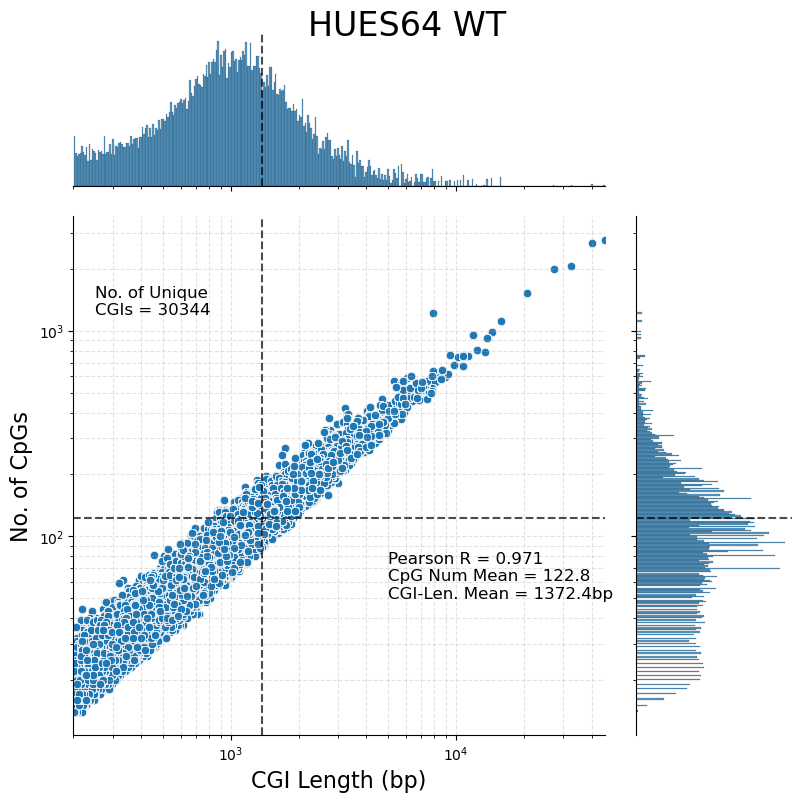

In [22]:
#df.plot(x='CGIlen',y='CpGNum',kind='scatter')
#plt.savefig('WholeGenome_CpGNumvCGILen')
#df.hist(column='CpGNum', bins=100)
#df.hist(column='CGIlen', bins=100)
#df.hist(column='WGBS', bins=100)

# Create joint plot w/calculated linear regression statistics 

fs=16
graph=sns.jointplot(data=df[['CGIlen','CpGNum']],x=df['CGIlen'],y=df['CpGNum'],kind='scatter',height=8,ratio=3,marginal_kws=dict(log_scale=True))
#graph.ax_joint.annotate(stats.pearsonr(df['CGIlen'],df['CpGNum']),xy=(1E3,1E3))
#graph.ax_joint.text(0.75E4,50,regrLBL,fontsize=fs)

#Caculate CpGNum and CGIlen mean/standard dev.
CpGNum_mean=df['CpGNum'].mean()
CpGNum_std=df['CpGNum'].std()
CGIlen_mean=df['CGIlen'].mean()
CGIlen_std=df['CGIlen'].std()

#Show Simple correlation statistics
ssLBL = "No. of Unique \nCGIs = {}".format(df['CGIno'].max())
#pearLBL = "Pearson R = {:.2f} \n p-value= {:.15E}".format(prSS[0], prSS[1])
pearLBL = "Pearson R = {:.3f} \nCpG Num Mean = {:.1f} \nCGI-Len. Mean = {:.1f}bp".format(prSS[0],CpGNum_mean,CGIlen_mean)

graph.set_axis_labels('CGI Length (bp)', 'No. of CpGs', fontsize=fs)
graph.ax_joint.text(250,1.2E3,ssLBL,fontsize=fs-4)

graph.refline(x=CGIlen_mean,y=CpGNum_mean,color='black',ls='--',alpha=0.7)

graph.ax_joint.text(0.5E4,50,pearLBL,fontsize=fs-4)
plt.grid(which='both',linestyle='--',alpha=0.35)
plt.xlim([200, df['CGIlen'].max()])
plt.suptitle('HUES64 WT',fontsize=fs*1.5)
plt.subplots_adjust(top=0.95)
plt.savefig('HUES64_CGIlen_CpGNum_Hist')

       CGIno      WGBS  CpGNum  CGIlen
0          1  0.545952   116.0  1075.0
1          2  0.913393    30.0   439.0
2          6  0.878784    94.0   895.0
3          7  0.947243   171.0  1911.0
4          8  0.002805    60.0   563.0
...      ...       ...     ...     ...
27260  30339  1.000000    21.0   227.0
27261  30341  0.935996    32.0   397.0
27262  30342  0.929552    25.0   229.0
27263  30343  0.484525    36.0   389.0
27264  30344  0.909265    29.0   308.0

[27265 rows x 4 columns]


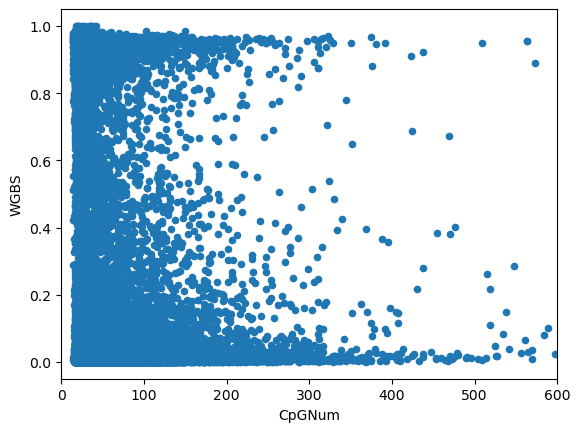

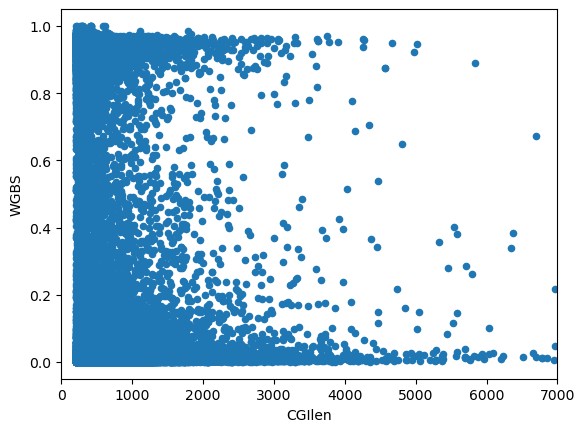

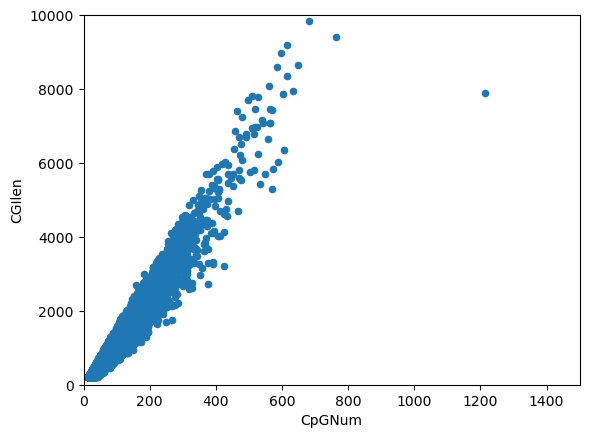

In [7]:
#Here, we want to average all of the available information on an Island basis. 
#Thus, for each CpG Island, we will have a mean WGBS value, and corroborated CpG Number/CGI Length
IslandLvl_avg = df.groupby('CGIno')[['WGBS','CpGNum','CGIlen']].mean().reset_index() 
print(IslandLvl_avg)

# These means just aggregate the information assocaited witht the CGIno. 
#But for each unique CGIno, the elements should be equal.

IslandLvl_avg.plot(x='CpGNum',y='WGBS',kind='scatter')
plt.xlim([0,600])
plt.show()

IslandLvl_avg.plot(x='CGIlen',y='WGBS',kind='scatter')
plt.xlim([0,7000])
plt.show()

IslandLvl_avg.plot(x='CpGNum',y='CGIlen',kind='scatter')
plt.xlim([0,1500])
plt.ylim([0,10000])
plt.show()

Number of  CGIs Reported from UCSC =  30344
Number of CGIs with any WGBS Values =  27265
       CGIno  CpGCounts
0      29207       1203
1      18465       1137
2       2974       1038
3      24893       1016
4      27400        965
...      ...        ...
27260   6993          1
27261  23793          1
27262  14021          1
27263  14025          1
27264  14011          1

[27265 rows x 2 columns]
   CGIno      WGBS  CpGNum  CGIlen  CpGCounts
0      1  0.545952   116.0  1075.0         15
1      2  0.913393    30.0   439.0         15
2      6  0.878784    94.0   895.0         19
3      7  0.947243   171.0  1911.0         36
4      8  0.002805    60.0   563.0         60
5      9  0.010527   115.0  1029.0         77
6     10  0.977954    28.0   348.0          9
7     11  0.586085    24.0   363.0         24
8     12  0.105853    50.0   430.0         50
9     13  0.032694    83.0   925.0        119
   CGIno      WGBS  CpGNum  CGIlen  CpGCounts  CpGCoverage
0      1  0.545952   116.0  1075

<Axes: >

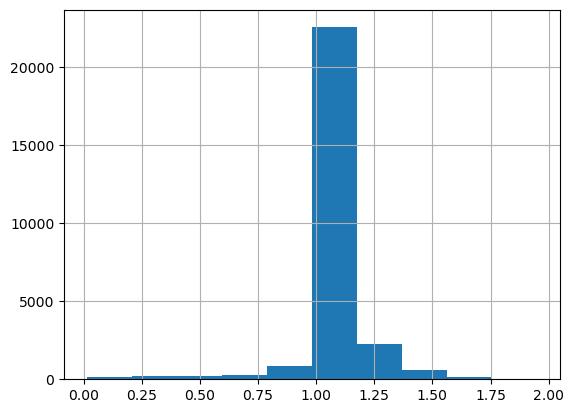

In [8]:
# Checking coverage of data. I.e. For a given CGI, how many of its CpGs has associated WGBS values?
#Find how many CGIs are represented in current intersection of CGI annotation and WGBS values

print('Number of  CGIs Reported from UCSC = ',df_hol['CGIno'].max()) #Note that this refers to the raw CGI Annotation
print('Number of CGIs with any WGBS Values = ',df['CGIno'].nunique())

#print(df['CGIno'].value_counts())
AA = df['CGIno'].value_counts().rename_axis('CGIno').reset_index(name='CpGCounts')
print(AA)

TestAA = IslandLvl_avg.join(AA.set_index('CGIno'),on='CGIno')
print(TestAA.head(10))

print
TestAA['CpGCoverage'] = TestAA['CpGCounts']/TestAA['CpGNum']
print(TestAA.head(10))

TestAA['CpGCoverage'].hist()

In [9]:
#Export relevant dataframes for Bivariate histogram analysis in MATLAB
df.to_csv('CGIs_WGBS_Raw')
CpGNumvWGBS.to_csv('CpGvsWGBS_mean') 
LenvWGBS.to_csv('CGIlengthvWGBS_mean')
IslandLvl_avg.to_csv('IslandLvl_agg_HUES64WT')